<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 132.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 93.7 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [4]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [6]:
# Check for missing values in critical columns
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_values)

# Decide on a strategy: Drop rows where 'Employment' or 'JobSat' is missing, as these are critical for analysis.
df = df.dropna(subset=['Employment', 'JobSat'])

# For 'RemoteWork', we can fill missing values with 'Not specified'
df['RemoteWork'] = df['RemoteWork'].fillna('Not specified')

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


[ nan 12.  27.  10.   0.5 18.  15.  17.   6.   7.  16.  14.   4.   8.
  2.  29.   5.  30.   1.  25.  24.  26.   9.  20.  37.  11.   3.  13.
 19.  21.  23.  34.  28.  32.  22.  33.  40.  39.  31.  35.  41.  38.
 51.  36.  43.  42.  50.  45.  44.  46.  48.  47.  49. ]


/tmp/ipykernel_301/2860906359.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat_by_experience = df.groupby('YearsCodeProRange')['JobSatPoints'].median().reset_index()
/tmp/ipykernel_301/2860906359.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_job_sat_by_experience, x='YearsCodeProRange', y='JobSatPoints', palette='viridis')


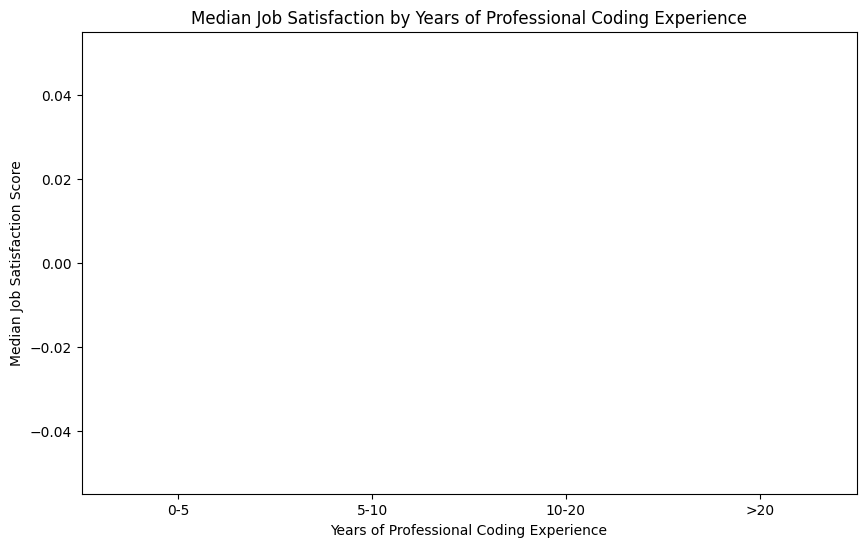

In [8]:
# Ensure YearsCodePro is a string and replace special cases
df["YearsCodePro"] = df["YearsCodePro"].replace({
    "Less than 1 year": 0.5,
    "More than 50 years": 51
})

# Convert YearsCodePro to numeric (ignoring errors)
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

# Check if conversion worked
print(df["YearsCodePro"].unique())

# Define bins for categorization
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']

# Apply binning using pd.cut
df['YearsCodeProRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Handle missing values in JobSat before mapping
df['JobSat'] = df['JobSat'].fillna('Neutral')

# Map JobSat to numerical values
job_sat_mapping = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neutral': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}
df['JobSatPoints'] = df['JobSat'].map(job_sat_mapping)

# Calculate median JobSat for each experience range
median_job_sat_by_experience = df.groupby('YearsCodeProRange')['JobSatPoints'].median().reset_index()

# Bar plot for median JobSat by experience range
plt.figure(figsize=(10, 6))
sns.barplot(data=median_job_sat_by_experience, x='YearsCodeProRange', y='JobSatPoints', palette='viridis')

plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction Score')

plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


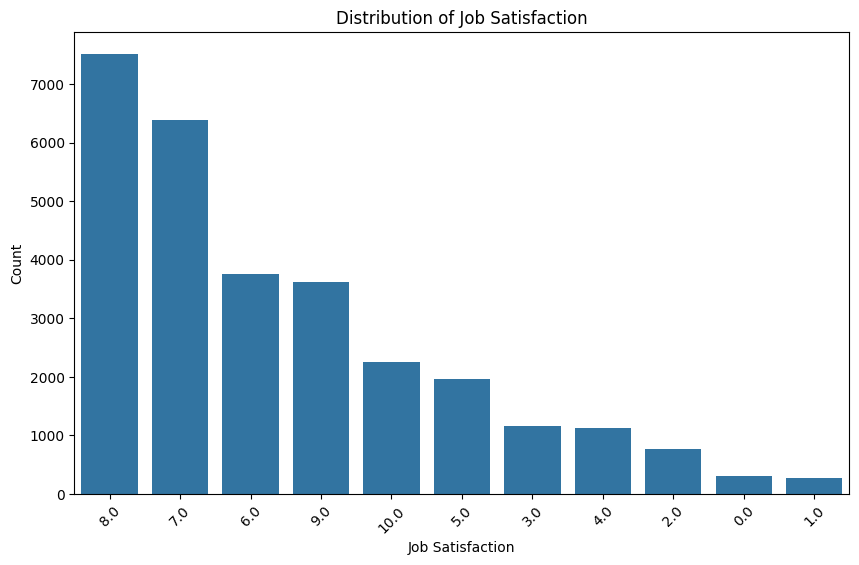

In [9]:
# Count plot for JobSat
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


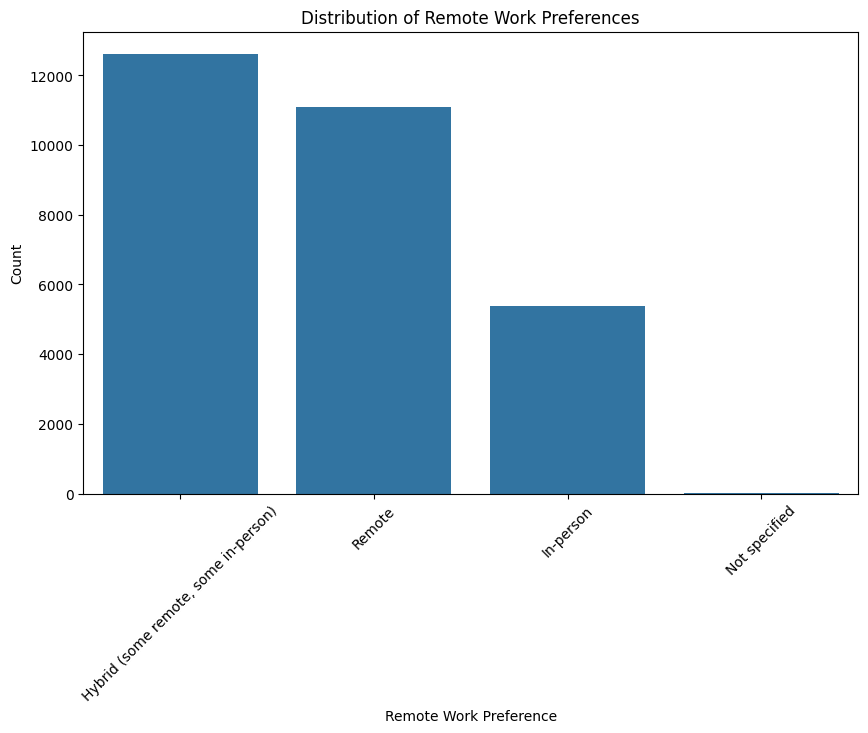

In [10]:
# Count plot for RemoteWork
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [8]:
# Cross-tabulation of RemoteWork by Employment
remote_work_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'])
print(remote_work_by_employment)

# Cross-tabulation of RemoteWork by Job Roles
remote_work_by_job_role = pd.crosstab(df['DevType'], df['RemoteWork'])
print(remote_work_by_job_role)

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                10006   
Employed, full-time;Employed, part-time                                               49   
Employed, full-time;Independent contractor, fre...                                   829   
Employed, full-time;Independent contractor, fre...                                    53   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Independent contractor, free...                                     1   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Not employed, but looking fo...                              

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [17]:
# Define regions/countries to analyze
selected_countries = ["United States", "Canada", "India", "Germany", "United Kingdom"]

# Ensure 'Country' column is clean
df['Country'] = df['Country'].astype(str).str.strip()

# Filter data for selected regions
df_filtered = df[df['Country'].isin(selected_countries)]

# Ensure we have data before proceeding
if df_filtered.empty:
    print("No data available for the selected countries.")
else:
    # Drop NaN values in the 'LanguageHaveWorkedWith' column
    df_filtered = df_filtered.dropna(subset=['LanguageHaveWorkedWith'])

    # Split languages into individual entries
    language_data = df_filtered[['Country', 'LanguageHaveWorkedWith']].copy()
    language_data['Language'] = language_data['LanguageHaveWorkedWith'].str.split(';')
    language_data = language_data.explode('Language')

    # Count occurrences of each language per country
    language_counts = language_data.groupby(['Country', 'Language']).size().unstack(fill_value=0)

    # Check if language_counts is empty before proceeding
    if language_counts.empty:
        print("No programming language data available for the selected countries.")
    else:
        # Normalize values for better comparison
        language_counts_normalized = language_counts.div(language_counts.sum(axis=1), axis=0).fillna(0)

        # 🎨 **Heatmap of Language Popularity by Country**
        plt.figure(figsize=(12, 6))
        sns.heatmap(language_counts_normalized.T, cmap="Blues", annot=True, fmt=".2f", linewidths=0.5)
        plt.title("Popularity of Programming Languages by Country")
        plt.xlabel("Country")
        plt.ylabel("Programming Language")
        plt.show()

        # 🎨 **Bar Plot for a Single Country (e.g., USA)**
        if "United States" in language_counts.index:
            top_languages_usa = language_counts.loc["United States"].sort_values(ascending=False).head(10)

            plt.figure(figsize=(10, 6))
            top_languages_usa.plot(kind='bar', color='skyblue', edgecolor='black')
            plt.title("Top 10 Programming Languages in the United States")
            plt.xlabel("Programming Language")
            plt.ylabel("Usage Count")
            plt.xticks(rotation=45)
            plt.show()
        else:
            print("United States data is not available in the dataset.")


No data available for the selected countries.


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


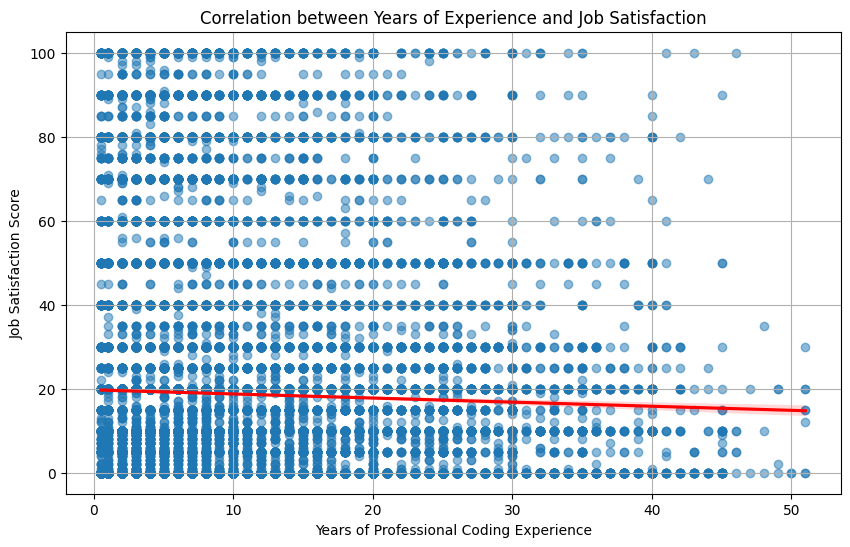

In [18]:
# Ensure YearsCodePro is numeric (some datasets have 'Less than 1 year' or 'More than 50 years')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Ensure JobSatPoints_1 is numeric
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop missing values
df_cleaned = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# Check if the cleaned dataset has data
if df_cleaned.empty:
    print("No valid data available for YearsCodePro and JobSatPoints_1.")
else:
    # 🎨 **Scatter Plot with Regression Line**
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df_cleaned['YearsCodePro'], y=df_cleaned['JobSatPoints_1'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

    plt.title("Correlation between Years of Experience and Job Satisfaction")
    plt.xlabel("Years of Professional Coding Experience")
    plt.ylabel("Job Satisfaction Score")
    plt.grid(True)
    plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


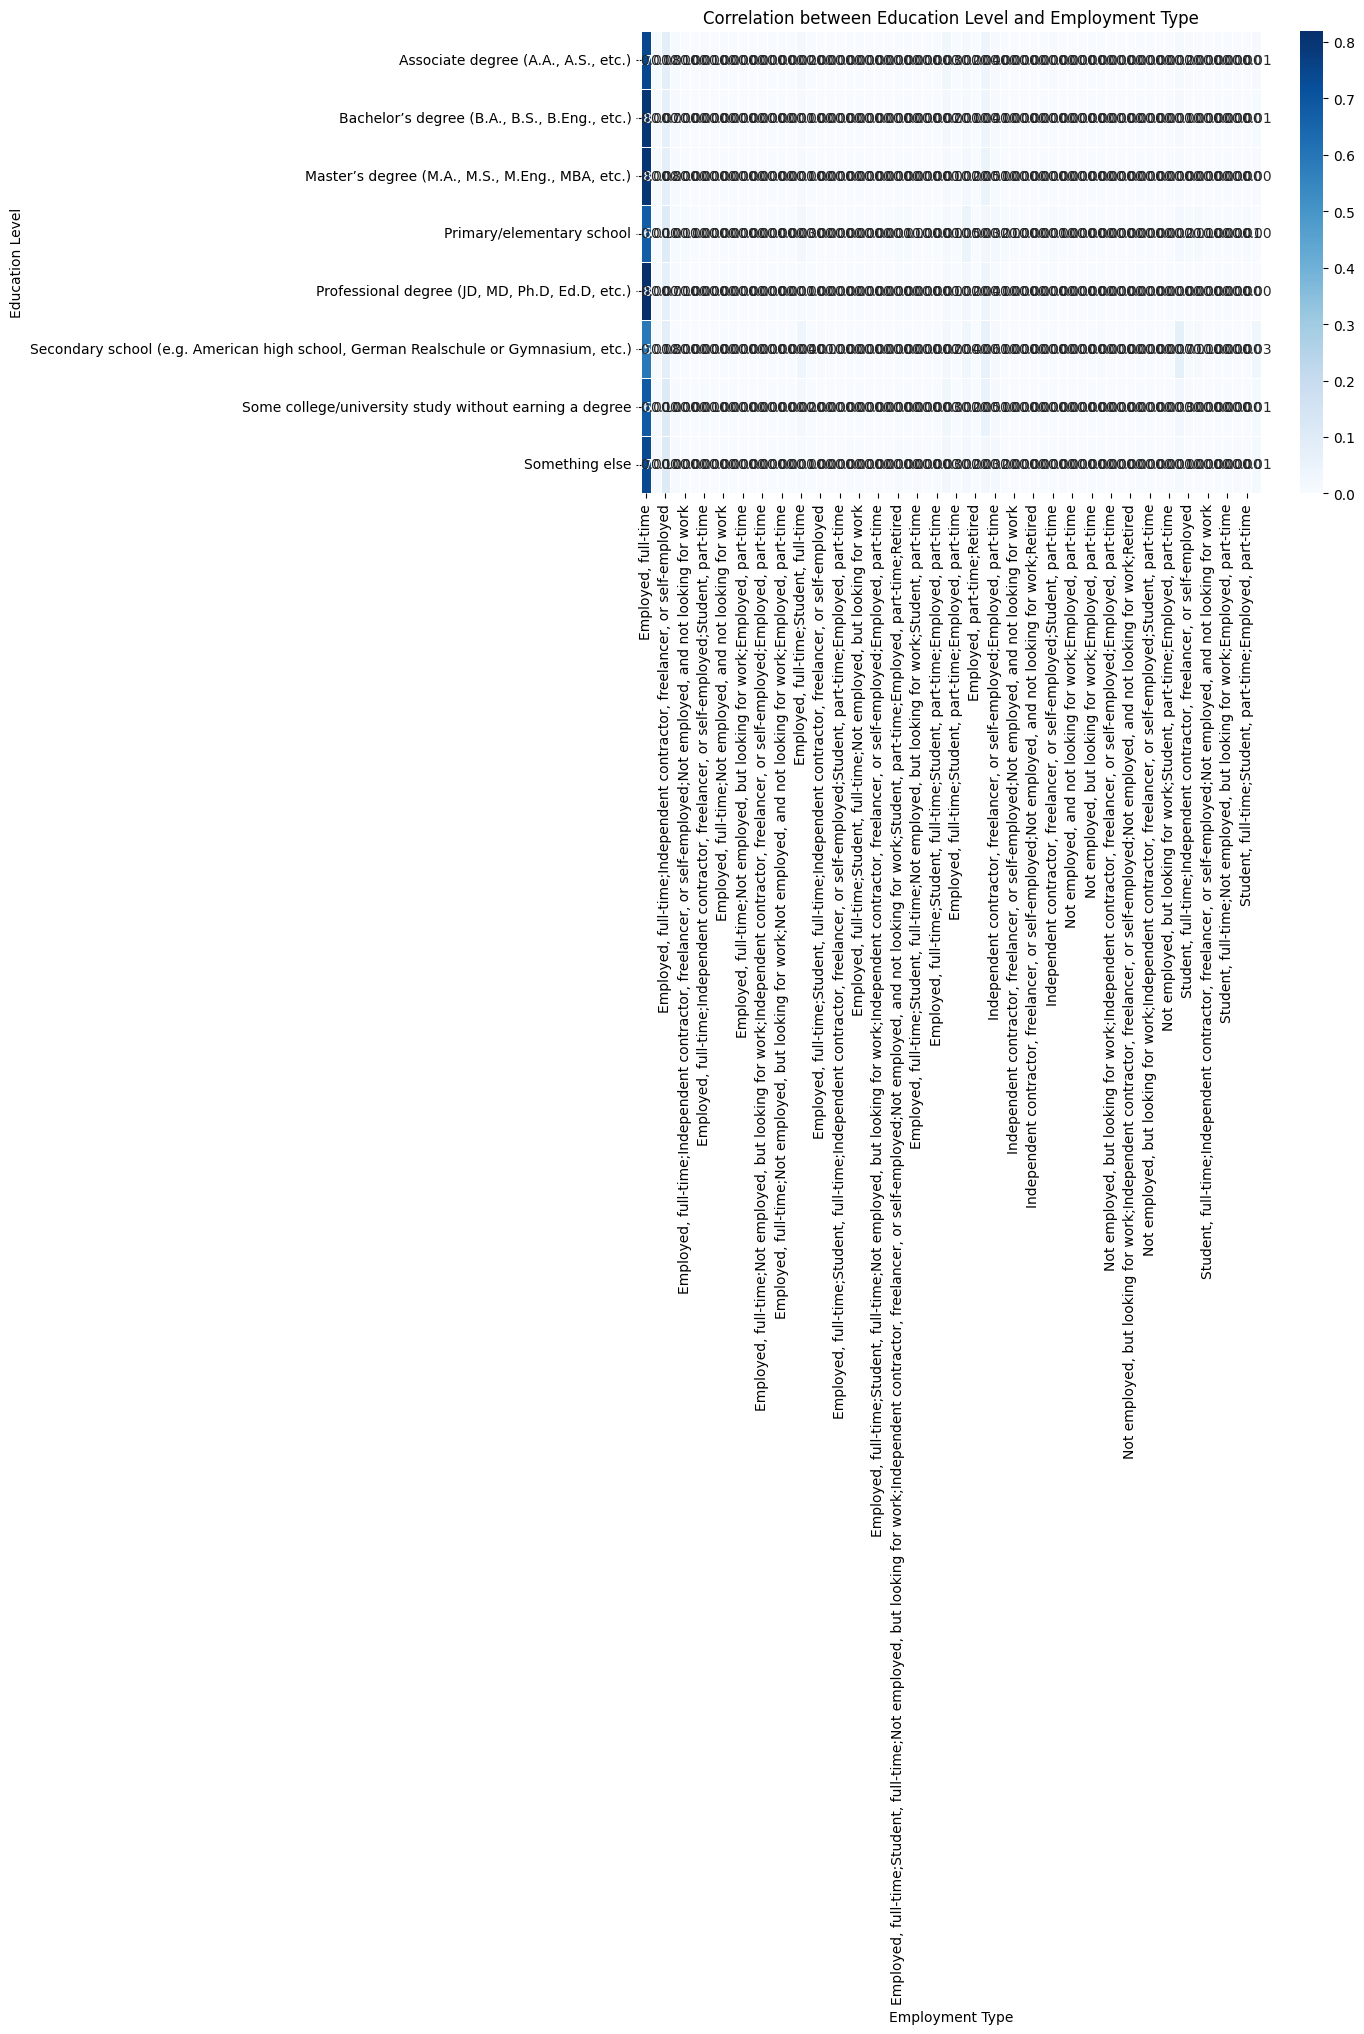

/tmp/ipykernel_301/1151696563.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

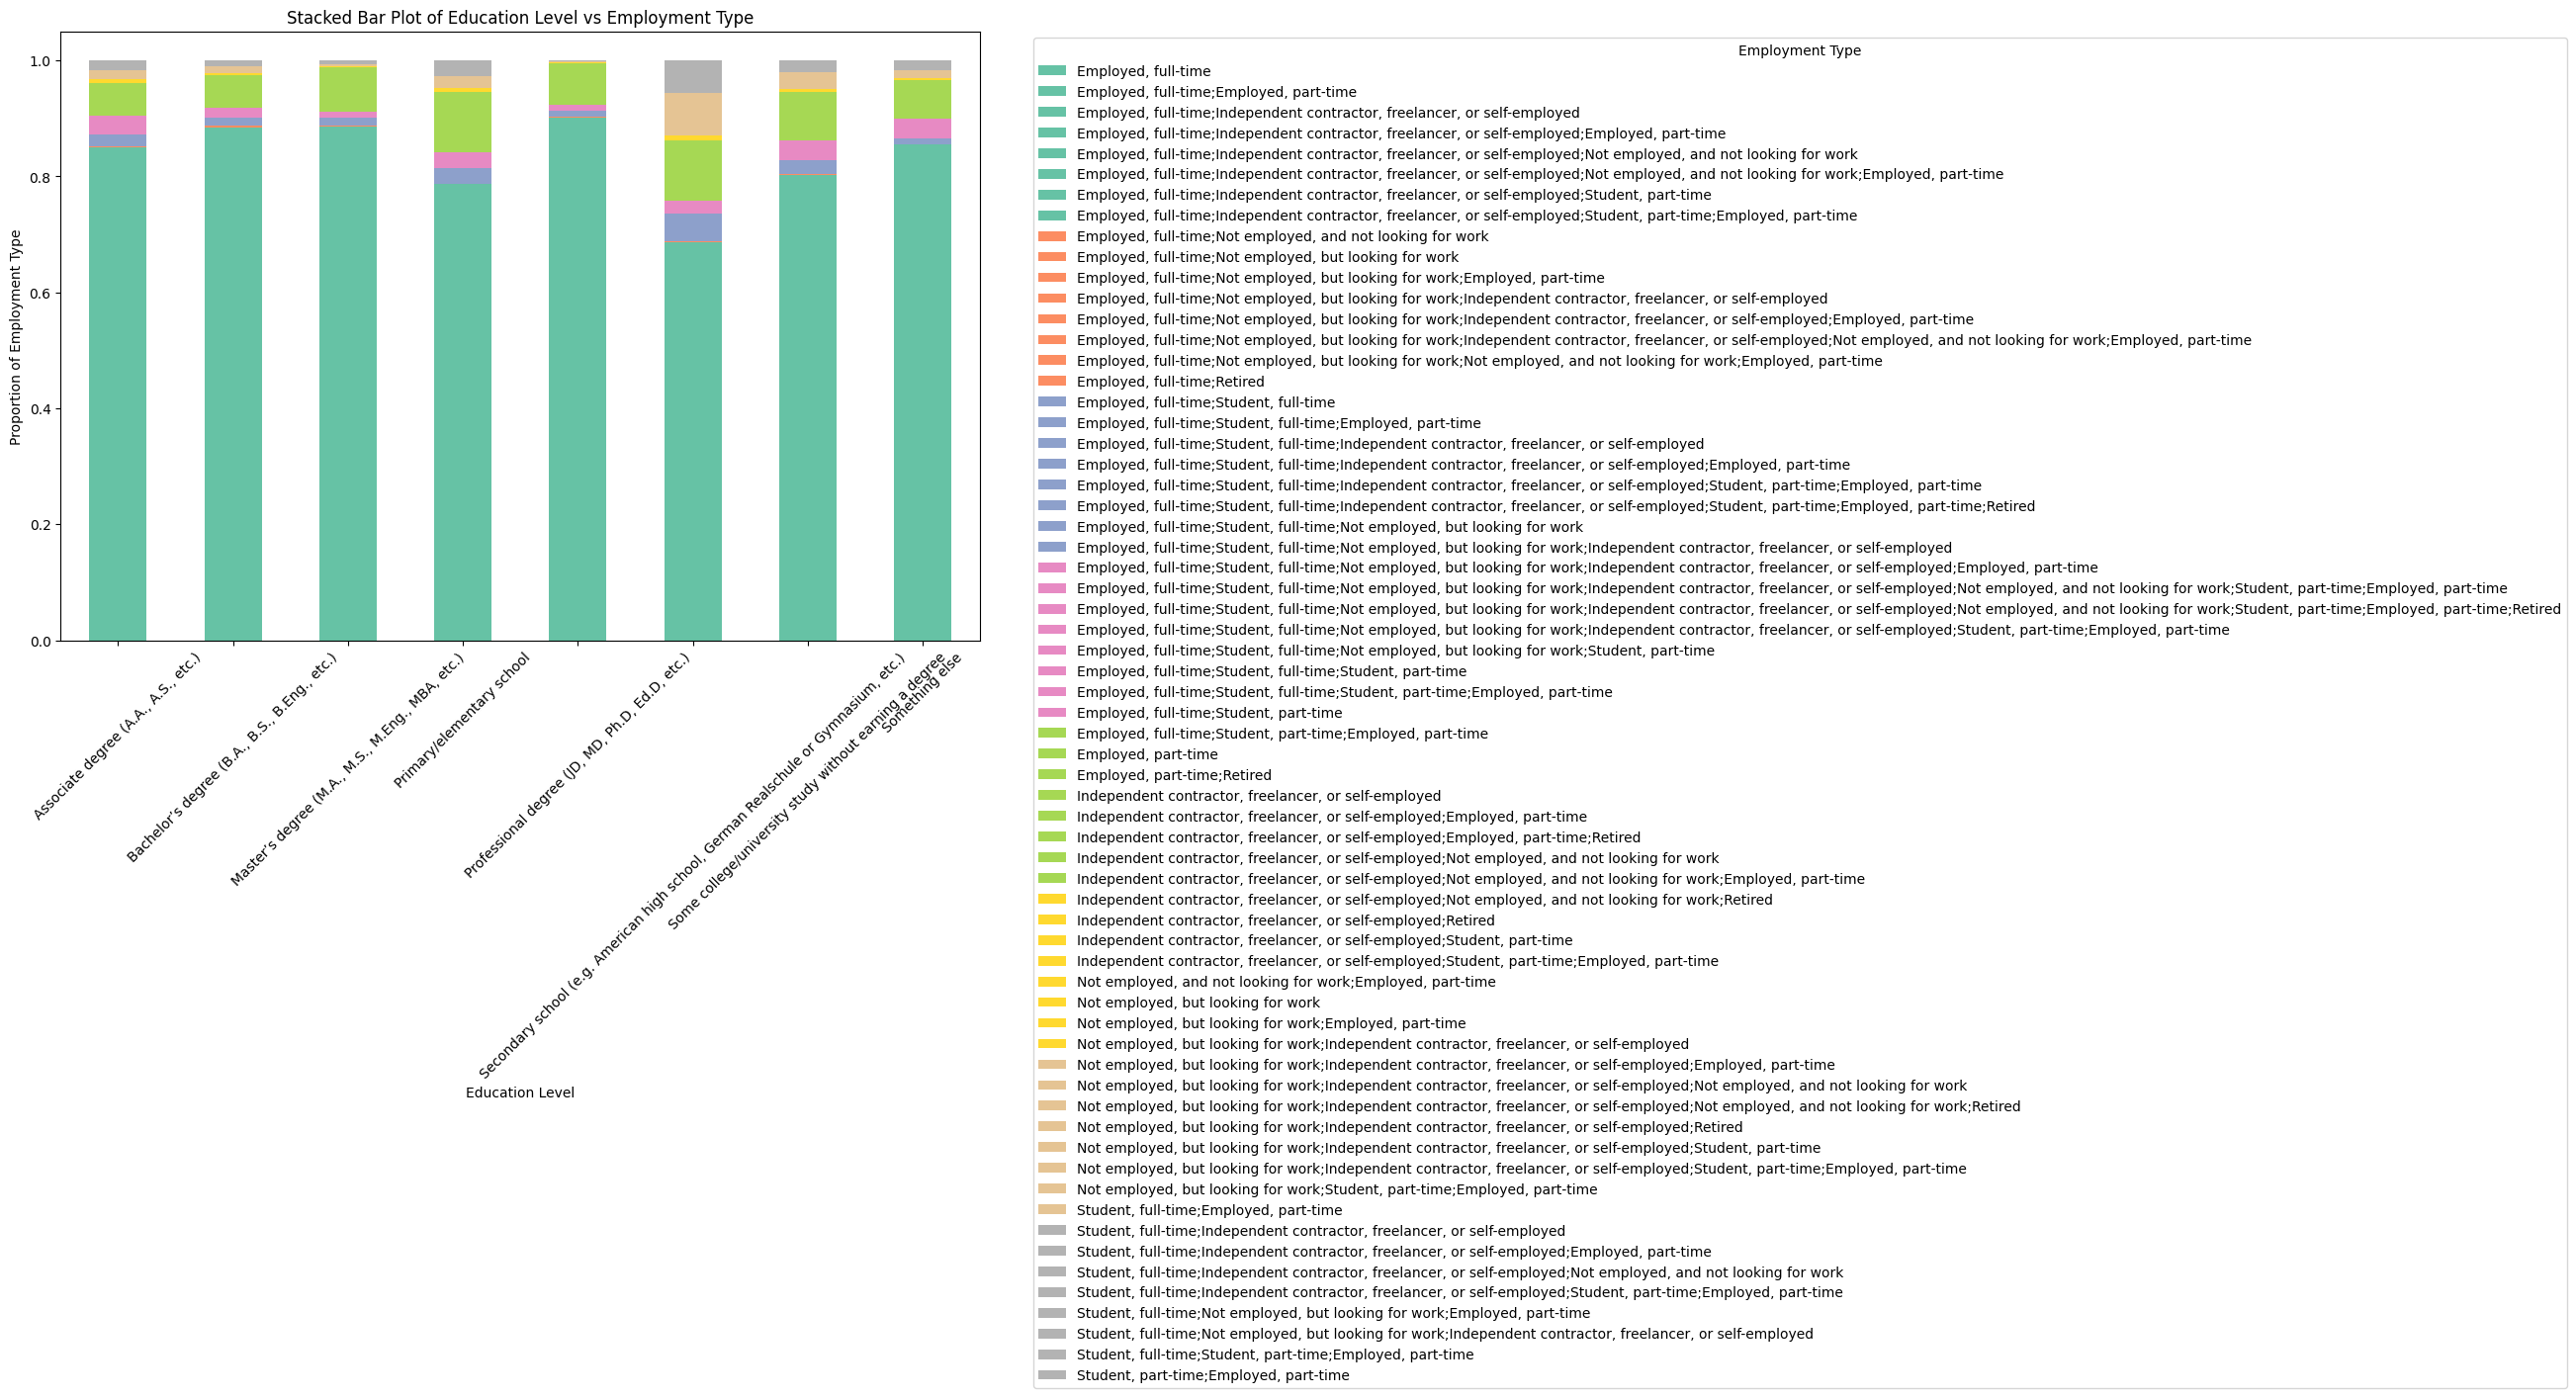

In [19]:
# Generate cross-tabulation to understand the relationship between EdLevel and Employment
education_employment_crosstab = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index')

# 🎨 **Heatmap Visualization of Cross-tabulation**
plt.figure(figsize=(10, 6))
sns.heatmap(education_employment_crosstab, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)

plt.title("Correlation between Education Level and Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Education Level")
plt.show()

# 🎨 **Bar Plot Visualization**
plt.figure(figsize=(12, 8))
education_employment_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set2')

plt.title("Stacked Bar Plot of Education Level vs Employment Type")
plt.xlabel("Education Level")
plt.ylabel("Proportion of Employment Type")
plt.xticks(rotation=45)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [20]:
# Save the modified dataset to a CSV file
df_filtered.to_csv('modified_dataset.csv', index=False)

# Alternatively, if you want to save the cross-tabulated data:
education_employment_crosstab.to_csv('education_employment_crosstab.csv')

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
